# Abstract: Named Entity Recognition
#### In this notebook I am trying to find out named entity in documents:
- It will help us understand if all documents are based on same geographic location
- Find the topics in corpus based on entities
- looking for trends in data

# Importing Libraries:

In [2]:
# Data Manupulation
import pandas as pd
import numpy as np
from collections import Counter

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Text cleaning
import nltk
import spacy
from spacy import displacy

# setting colwidth to 200; help in the visual analysis of sentences 
pd.set_option("display.max_colwidth", 200)
%matplotlib notebook
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [4]:
# nlp = en_core_web_lg.load()
nlp = spacy.load('en_core_web_sm')

In [5]:
df_text = pd.read_csv('cleaned_data.csv', usecols=['cleaned_description','lemmatized_description'], converters={'lemmatized_description': eval})
df_text.head(3)

,cleaned_description,lemmatized_description
0,dubai the group led by al qaeda ally abu musab al zarqawi said it beheaded two iraqi soldiers in broad daylight in mosul a statement found on an islamist web site on friday said,"[dubai, group, lead, al, qaeda, ally, abu, musab, al, zarqawi, say, behead, two, iraqi, soldier, broad, daylight, mosul, statement, find, islamist, web, site, friday, say]"
1,santa monica calif the stars of the video game industry came out in force on tuesday night to honor their peers for creative excellence taking a page from the hollywood playbook with re...,"[santa, monica, calif, star, video, game, industry, come, force, tuesday, night, honor, peer, creative, excellence, take, page, hollywood, playbook, red, carpet, glitter, gem, live, nationwide, br..."
2,ap a week of rallies marches and nearly arrests left anti bush protesters drained and the city refuting allegations that demonstrators were held too long in police custody,"[ap, week, rally, marche, nearly, arrest, leave, anti, bush, protester, drain, city, refute, allegation, demonstrator, hold, long, police, custody]"


## Finding Named Entities in our corpus:

In [6]:
entity_dict = {}
for data in df_text['cleaned_description']:
    doc = nlp(data)
    for X in doc.ents:
        if X.label_ in entity_dict:
            entity_dict[X.label_].append(X.text)
        else:
            entity_dict[X.label_] = [X.text]


In [7]:
entity_df = pd.DataFrame(entity_dict.items(), columns=['Labels', 'Entities'])
# Removing duplicate entities
entity_df['Entities'] = entity_df['Entities'].apply(lambda x: list(set(x))) 


In [8]:
entity_df = entity_df.set_index(entity_df.Labels).transpose()[1:]
entity_df

Labels,CARDINAL,DATE,TIME,GPE,ORDINAL,QUANTITY,PERSON,PERCENT,MONEY,NORP,ORG,EVENT,PRODUCT,LOC
Entities,"[sixty three million, over three, number two, zero, nfc, more than , roughly a million, as many as , spaceflight, up to one third, at least eight, as many as half, eight, asia s, on...","[the end of july, the same quarter, the past two decades, nearly two years, two plus years, nearly years, five year old, the fiscal third quarter, next sunday, next friday, a second day, three ...","[seven hours, seconds, the last night, eight minutes, six seconds, hours minutes and seconds, the final minutes, sunday morning, two hours , this hour, working hours, about hours, t...","[iraq, switzerland, mexico, chicago, london, oregon, california, russia, xingsheng, china, vietnam, israel, afghanistan, zhuhai, india, juan, houston]","[first, ninth, fourth, seventh, tenth, sixth, twelfth, second, third, eighth, fifth]","[some kilometres, s moon, about billion, about one million barrels, s danny, more than a tonne, billion pound, a ton, between manchester, four million barrels, seven fold, million pound,...","[bin, david hill, mm, london , kelly , eric, warren , al, john van benschoten, jack, al davis, anton van rossum, arthur, sharon]","[ten percent, about nine percent, at least percent, roughly percent, as much as billion, ten percent, another percent, over percent, about percent, four percent, as much as...","[four cents, some billion, hundreds of billions of dollar, six per cent, more than billion, multibillion dollar, a cent, six cents, about billion, nearly cents, millions of dollar...","[iraqi, taiwanese, french, american, russian, japanese, cambodian, kurds, european, americans, democrats, british, israeli, christian, democrat, tibetan, chinese, republicans, palestinian, bavaria...","[pentagon, al jazeera , al jazeera]","[the vietnam war, the cold war, the civil war]","[zealand s, s, earth s, early s]","[the al east, the middle east, europe]"


In [9]:
print('The total Unique geolocation in corpus:{0}'.format(entity_df['GPE'].str.len() + entity_df['LOC'].str.len()))
print(entity_df['GPE'] + entity_df['LOC'])

The total Unique geolocation in corpus:Entities    20
dtype: int64
Entities    [iraq, switzerland, mexico, chicago, london, oregon, california, russia, xingsheng, china, vietnam, israel, afghanistan, zhuhai, india, juan, houston, the al east, the middle east, europe]
dtype: object


## Using other approach:
- Some of the geolocations like new york, dubai are missing
- Lets load spacy `nlp = spacy.load('en_core_web_md')` medium model which has better accuracy

In [48]:
nlp = spacy.load('en_core_web_md')
named_entities = []
for sentence in df_text['lemmatized_description']:
    temp_entity_name = ''
    temp_named_entity = None
    sentence = nlp(' '.join(sentence))
    for word in sentence:
        term = word.text 
        tag = word.ent_type_
        if tag:
            temp_entity_name = ' '.join([temp_entity_name, term]).strip()
            temp_named_entity = (temp_entity_name, tag)
        else:
            if temp_named_entity:
                named_entities.append(temp_named_entity)
                temp_entity_name = ''
                temp_named_entity = None

entity_frame = pd.DataFrame(named_entities, columns=['Entity_Name', 'Entity_Type'])

In [32]:
entity_frame.head(10)

,Entity_Name,Entity_Type
0,al qaeda,ORG
1,two,CARDINAL
2,friday,DATE
3,tuesday night,TIME
4,thursday hours,TIME
5,ten,CARDINAL
6,today,DATE
7,sundays,DATE
8,tuesday,DATE
9,baghdad,PERSON


In [49]:
entity_frame['Entity_Type'].value_counts()

DATE        5743
GPE         2529
CARDINAL    2199
PERSON      1317
ORDINAL     1216
NORP         938
TIME         426
ORG          219
MONEY         67
PERCENT       29
PRODUCT       28
QUANTITY      25
FAC           11
LOC           10
EVENT          4
LANGUAGE       2
Name: Entity_Type, dtype: int64

### Most frequent geolocation in news:

In [69]:
data = entity_frame['Entity_Name'].loc[(entity_frame['Entity_Type'] == 'LOC') ^ (entity_frame['Entity_Type'] == 'GPE')].value_counts()
data

iraq                 217
washington           206
india                 93
japan                 90
san francisco         80
                    ... 
thursday iraq          1
sunday cincinnati      1
fredericton            1
springfield            1
houston houston        1
Name: Entity_Name, Length: 452, dtype: int64

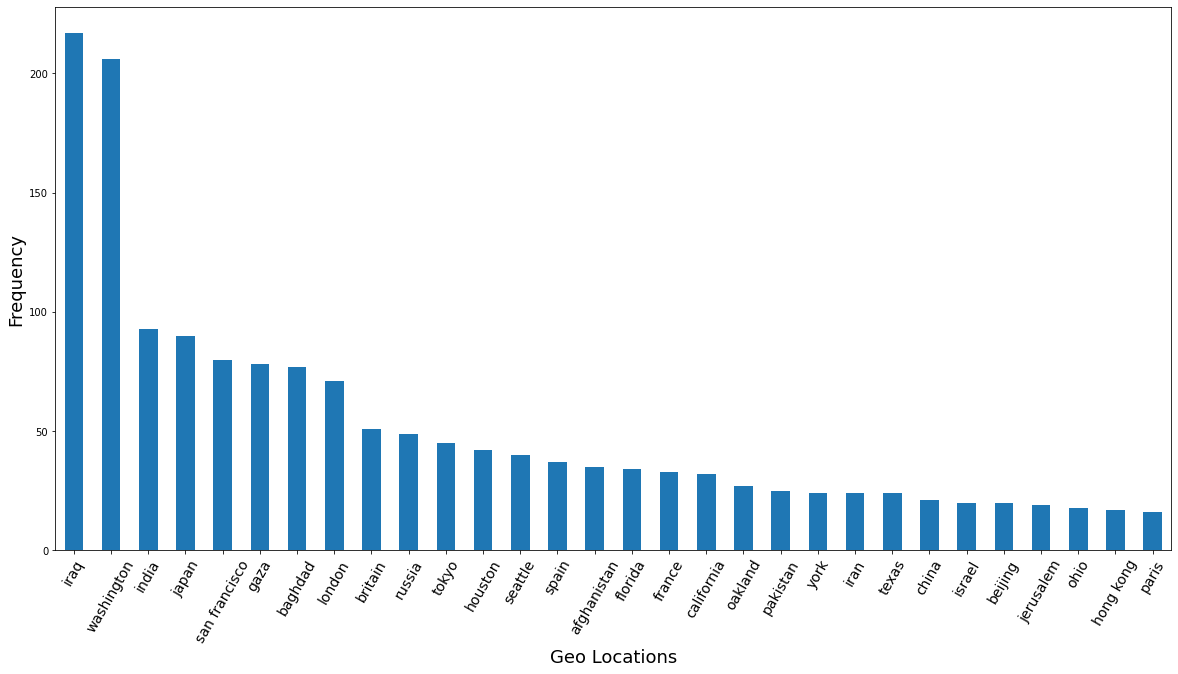

In [71]:
plt.figure(figsize=(20,10))
data[:30].plot.bar(align='center')
plt.xlabel('Geo Locations', fontsize = 18)
plt.ylabel('Frequency', fontsize = 18)
plt.xticks(rotation=60, fontsize = 14)
plt.show()

#### Erlier when we used small spaCy model it failed to recognized most of the entities: 
- Iraq and washington are dominant geolocation
- United state has most article apearance based on cities

### Most popular person:

In [72]:
data = entity_frame['Entity_Name'].loc[(entity_frame['Entity_Type'] == 'PERSON')].value_counts()
data

michael                55
ariel sharon           43
bush                   39
yasser                 35
mike                   33
                       ..
pierre de coubertin     1
michael jordan          1
niro                    1
olson                   1
holland today danny     1
Name: Entity_Name, Length: 538, dtype: int64

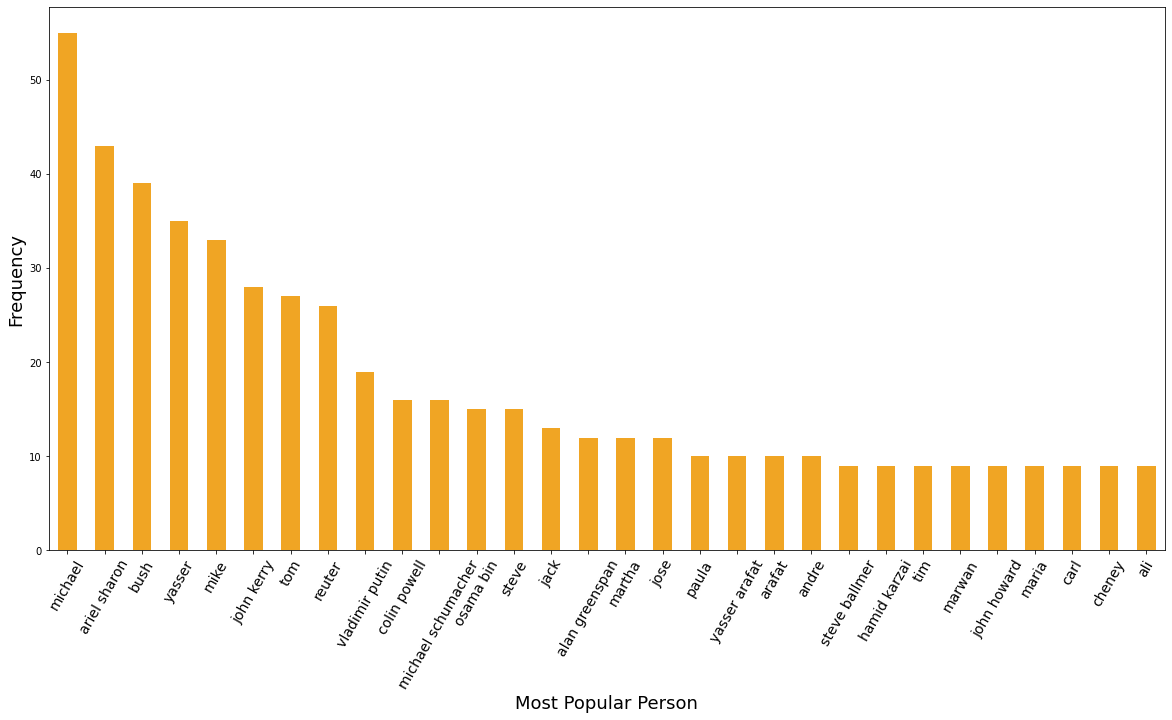

In [73]:
plt.figure(figsize=(20,10))
data[:30].plot.bar(align='center', color='#f0a524')
plt.xlabel('Most Popular Person', fontsize = 18)
plt.ylabel('Frequency', fontsize = 18)
plt.xticks(rotation=60, fontsize = 14)
plt.show()

- Reuter is recognized as most person entity

### Most in news orgnization:

In [81]:
data = entity_frame['Entity_Name'].loc[(entity_frame['Entity_Type'] == 'ORG')].value_counts()
data[:20]

york               101
eu                  16
al qaeda            15
wal mart             7
al jazeera           6
justin               5
hamas                4
stanford             4
oakland              4
nbc                  3
cnn                  3
reuter wal mart      3
pentagon             3
warner               3
compaq               2
percent              2
toshiba              2
campbell             2
toshiba corp         2
al qaida             2
Name: Entity_Name, dtype: int64

- york probably incorrect representation of orgnization it must be part of new york

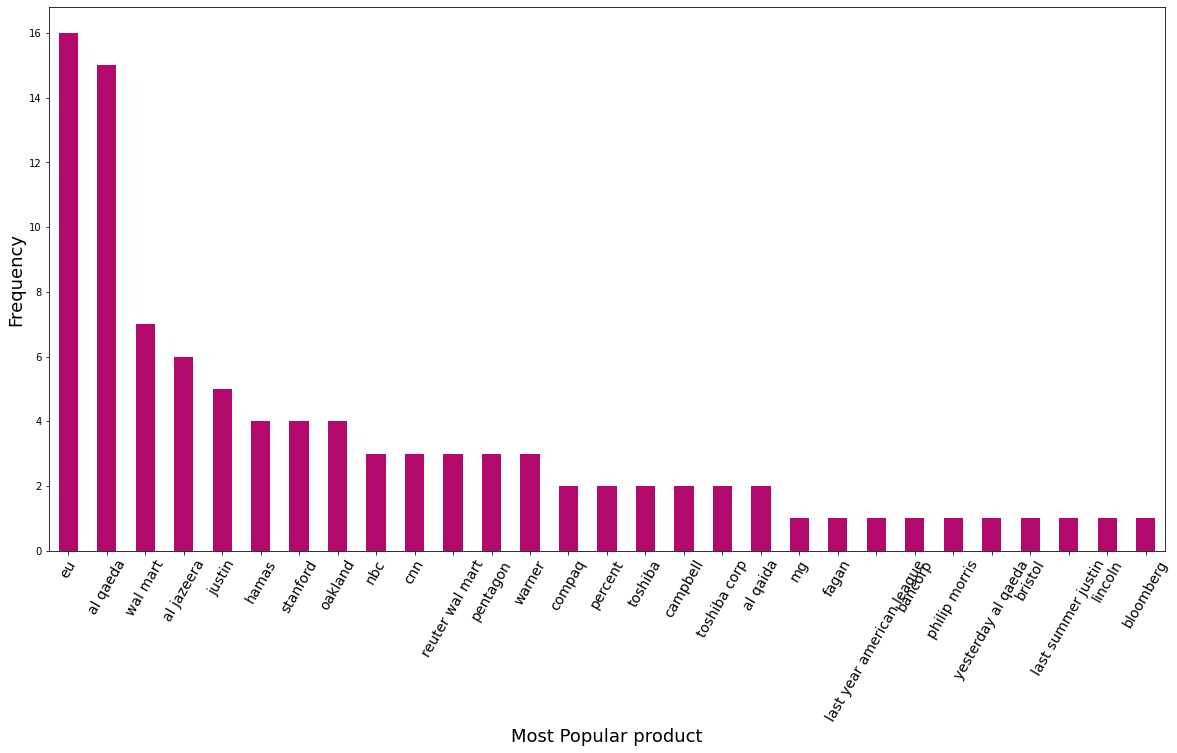

In [83]:
plt.figure(figsize=(20,10))
data[1:30].plot.bar(align='center', color='#b3096c')
plt.xlabel('Most Popular product', fontsize = 18)
plt.ylabel('Frequency', fontsize = 18)
plt.xticks(rotation=60, fontsize = 14)
plt.show()

- EU and Al qaeda are more frequent topics
- some of the topic like 'last year american league' are incorrect but can represent NFL

### Most popular product:

In [78]:
data = entity_frame['Entity_Name'].loc[(entity_frame['Entity_Type'] == 'PRODUCT')].value_counts()
data

reuter                   4
martin                   4
craig                    2
lourde                   1
gameboy                  1
saturn                   1
lockheed martin          1
bmw                      1
museveni                 1
jame                     1
umass                    1
jacque                   1
vernon                   1
aaron                    1
jos manuel               1
houston kenyon martin    1
gatlin                   1
moise                    1
javi                     1
reuter rafer             1
jimmy                    1
Name: Entity_Name, dtype: int64

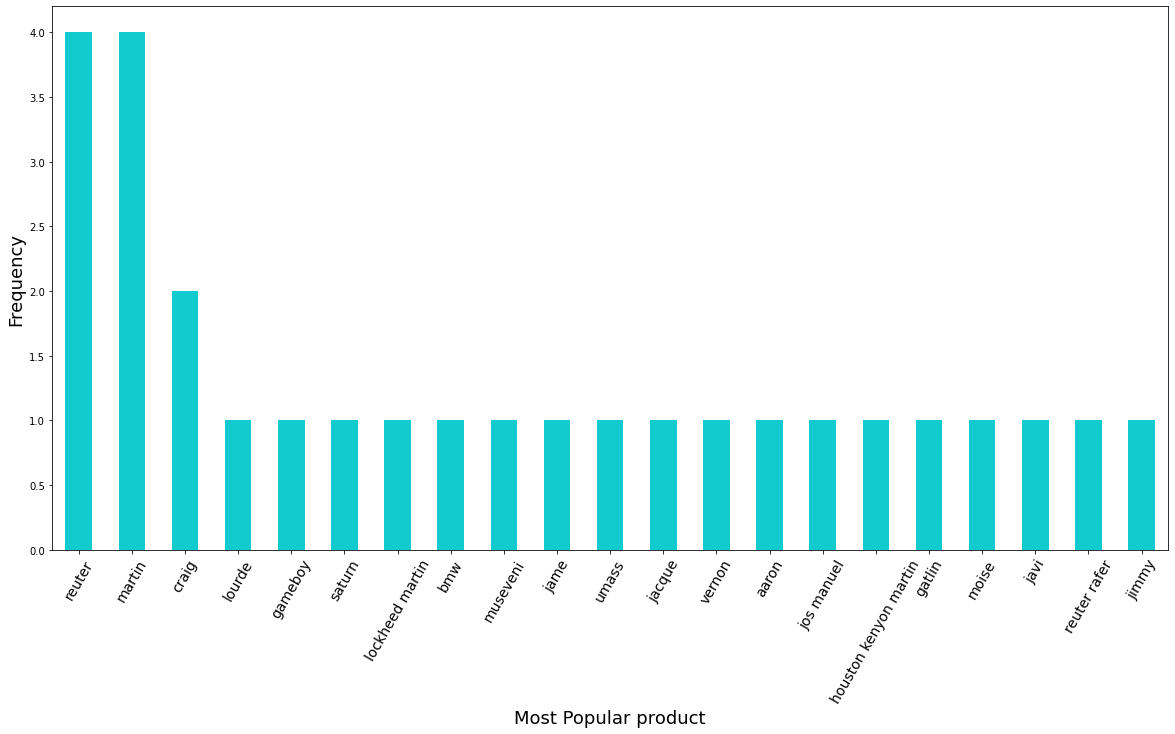

In [79]:
plt.figure(figsize=(20,10))
data[:30].plot.bar(align='center', color='#13cbcf')
plt.xlabel('Most Popular product', fontsize = 18)
plt.ylabel('Frequency', fontsize = 18)
plt.xticks(rotation=60, fontsize = 14)
plt.show()

- Happy to see gameboy is in topic after so many years

### Get the top named entities:
We are exluding DATE, CARDINAL, ORDINAL, TIME, MONEY, PERCENT from our analysis

In [90]:
new_data = entity_frame.loc[entity_frame['Entity_Type'].isin(['GPE','PERSON','NORP','ORG','PRODUCT','QUANTITY','FAC','LOC','EVENT','LANGUAGE'])]
new_data

,Entity_Name,Entity_Type
0,al qaeda,ORG
1,two iraqi,NORP
4,srinagar india,GPE
10,salomon,ORG
12,baghdad,GPE
...,...,...
14746,gaza,GPE
14747,britain,GPE
14749,michael schumacher,PERSON
14754,billion gallon,QUANTITY


In [91]:
top_entities = (new_data.groupby(by=['Entity_Name', 'Entity_Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.T.iloc[:,:15]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Entity_Name,iraq,washington,american,iraqi,york,india,japan,san francisco,gaza,baghdad,palestinian,london,israeli,japanese,michael
Entity_Type,GPE,GPE,NORP,NORP,ORG,GPE,GPE,GPE,GPE,GPE,NORP,GPE,NORP,NORP,PERSON
Frequency,217,206,121,102,101,93,90,80,78,77,76,71,64,64,55


- For more detailed analysis we can replace inflection from word like 'iraqi','israeli','american' etc


### The top named entity types


In [92]:
# get the top named entity types
top_entities = (entity_frame.groupby(by=['Entity_Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.T.iloc[:,:15]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Entity_Type,DATE,GPE,CARDINAL,PERSON,ORDINAL,NORP,TIME,ORG,MONEY,PERCENT,PRODUCT,QUANTITY,FAC,LOC,EVENT
Frequency,5743,2529,2199,1317,1216,938,426,219,67,29,28,25,11,10,4


## Conclusion:
- We are able to find more isight about our data using `spaCy` and `NLTK`
- Initially we got less detailed (failed to recognized most of entities) results from `en_core_web_sm`.
- The midium size model `en_core_web_md` work well for our `Named Entity Recognition` task
